# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy import stats
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

combinedData = pd.merge( study_results,mouse_metadata, how ="left", on =["Mouse ID"])
# Display the data table for preview
combinedData.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
numMice = len(combinedData["Mouse ID"].unique())
numMice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateMice = combinedData[combinedData.duplicated(["Mouse ID","Timepoint"])]
duplicateMice["Mouse ID"].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
combinedData.loc[combinedData["Mouse ID"]=="g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combinedCleanData = combinedData[combinedData["Mouse ID"]!="g989"]
combinedCleanData.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
numMiceCleanData = len(combinedCleanData["Mouse ID"].unique())
numMiceCleanData

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
meanTumorVolume = combinedCleanData["Tumor Volume (mm3)"].groupby(combinedCleanData["Drug Regimen"]).mean()
medianTumorVolume = combinedCleanData["Tumor Volume (mm3)"].groupby(combinedCleanData["Drug Regimen"]).median()
tumorVolumeVariance = combinedCleanData["Tumor Volume (mm3)"].groupby(combinedData["Drug Regimen"]).var()
tumorVolumeStd = combinedCleanData["Tumor Volume (mm3)"].groupby(combinedData["Drug Regimen"]).std()
tumorVolumeStdErr = combinedCleanData["Tumor Volume (mm3)"].groupby(combinedData["Drug Regimen"]).sem()

summaryStatistics = pd.DataFrame({"Mean Tumor Volume": meanTumorVolume,
                                  "Median Tumor Volume": medianTumorVolume,
                                  "Tumor Volume Variance": tumorVolumeVariance,
                                  "Tumor Volume Std. Dev.": tumorVolumeStd,
                                  "Tumor Volume Std. Err.": tumorVolumeStdErr  
})
summaryStatistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
outcome = combinedCleanData.copy()
outcome = outcome.groupby(["Drug Regimen"])
outcome["Tumor Volume (mm3)"].aggregate(['mean','median','var','std','sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

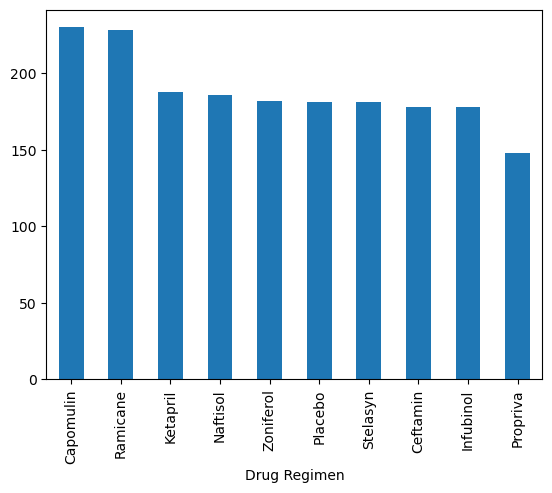

<Figure size 640x480 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

totalObservations = combinedCleanData["Mouse ID"].groupby(combinedData["Drug Regimen"]).count()

totalObservations.sort_values(ascending = False).plot(kind="bar")
plt.show()
plt.tight_layout()


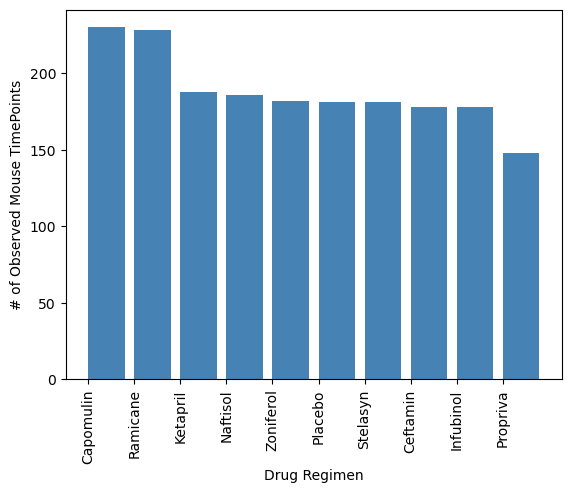

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
xAxis = np.arange(len(combinedCleanData["Drug Regimen"].unique()))
tickLocation = [value for value in xAxis]

val = combinedCleanData.groupby("Drug Regimen")["Mouse ID"].count()
val = val.sort_values(ascending=False)



plt.bar(xAxis, val , color ='steelblue', align="edge")
plt.xticks(tickLocation, val.index.values, rotation ="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse TimePoints")
plt.show()


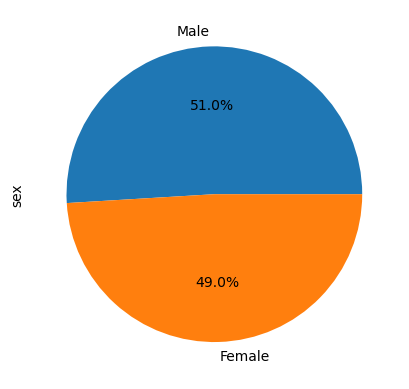

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = combinedCleanData.groupby("Sex")["Mouse ID"].count()
sex = sex.sort_values(ascending = False)
sex_df = pd.DataFrame({"sex": sex},
                      index = sex.index.values)
plot = sex_df.plot.pie(y="sex", autopct="%1.1f%%", legend = False)

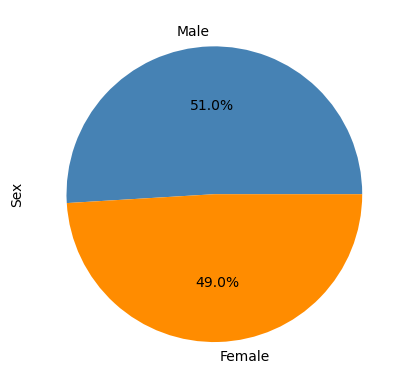

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = combinedCleanData.groupby("Sex")["Mouse ID"].count()
sex = sex.sort_values(ascending = False)
colors = ["steelblue", "darkorange"]
explode =(0.0,0.0)
plt.pie(sex, explode=explode, labels = sex.index.values, colors = colors,autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

finalTumorVolume = combinedCleanData["Tumor Volume (mm3)"].groupby(combinedCleanData["Mouse ID"]).unique()
# Start by getting the last (greatest) timepoint for each mouse
treatmentGroups = combinedCleanData["Drug Regimen"].groupby(combinedCleanData["Mouse ID"]).unique()
dfTest = pd.DataFrame(finalTumorVolume)
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# this code is from https://stackoverflow.com/questions/67201830/selecting-the-last-element-of-a-list-inside-a-pandas-dataframe
dfTest["Tumor Volume (mm3)"] = dfTest["Tumor Volume (mm3)"].apply(lambda x: x[-1])
dfTest

,Tumor Volume (mm3)
Mouse ID,
a203,67.973419
a251,65.525743
a262,70.717621
a275,62.999356
a366,63.440686
...,...
z435,48.710661
z578,30.638696
z581,62.754451


In [14]:
dfTreatmentGroups = pd.DataFrame(treatmentGroups)
dfTreatmentGroups

,Drug Regimen
Mouse ID,
a203,[Infubinol]
a251,[Infubinol]
a262,[Placebo]
a275,[Ceftamin]
a366,[Stelasyn]
...,...
z435,[Propriva]
z578,[Ramicane]
z581,[Infubinol]


In [15]:
combinedTreatmentData = pd.merge(dfTest, dfTreatmentGroups, how ="right", on =["Mouse ID"])
reducedTreatmentData =combinedTreatmentData.loc[
    (combinedTreatmentData["Drug Regimen"]=="Capomulin") |
    (combinedTreatmentData["Drug Regimen"]=="Ramicane") |
    (combinedTreatmentData["Drug Regimen"]=="Infubinol") |
    (combinedTreatmentData["Drug Regimen"]=="Ceftamin")
]
reducedTreatmentData

,Tumor Volume (mm3),Drug Regimen
Mouse ID,,
a203,67.973419,[Infubinol]
a251,65.525743,[Infubinol]
a275,62.999356,[Ceftamin]
a411,38.407618,[Ramicane]
a444,43.047543,[Ramicane]
...,...,...
y769,68.594745,[Ceftamin]
y793,31.896238,[Capomulin]
y865,64.729837,[Ceftamin]


In [16]:


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
capomulin_df = combinedTreatmentData.loc[(combinedTreatmentData["Drug Regimen"]=="Capomulin")]
capomulin = capomulin_df["Tumor Volume (mm3)"]
c_quartiles = capomulin.quantile([.25,.5,.75])
c_lowerq = c_quartiles[0.25]
c_upperq = c_quartiles[0.75]
c_iqr = c_upperq-c_lowerq
c_lowerBound =c_lowerq - (1.5*c_iqr)
c_upperBound = c_upperq + (1.5*c_iqr)
c_outliers = []
for c in capomulin:
    if c < c_lowerBound or c > c_upperBound:
        c_outliers.append(c)

ramicane_df = combinedTreatmentData.loc[(combinedTreatmentData["Drug Regimen"]=="Ramicane")]
ramicane = ramicane_df["Tumor Volume (mm3)"]
r_quartiles = ramicane.quantile([.25,.5,.75])
r_lowerq = r_quartiles[0.25]
r_upperq = r_quartiles[0.75]
r_iqr = r_upperq-r_lowerq
r_lowerBound =r_lowerq - (1.5*r_iqr)
r_upperBound = r_upperq + (1.5*r_iqr)
r_outliers = []
for r in ramicane:
    if r < r_lowerBound or r > r_upperBound:
        r_outliers.append(r)

infubinol_df = combinedTreatmentData.loc[(combinedTreatmentData["Drug Regimen"]=="Infubinol")]
infubinol = infubinol_df["Tumor Volume (mm3)"]
i_quartiles = infubinol.quantile([.25,.5,.75])
i_lowerq = i_quartiles[0.25]
i_upperq = i_quartiles[0.75]
i_iqr = i_upperq-i_lowerq
i_lowerBound = i_lowerq - (1.5*i_iqr)
i_upperBound = i_upperq + (1.5*i_iqr)
i_outliers = []
for i in infubinol:
    if i < i_lowerBound or i > i_upperBound:
        i_outliers.append(i)

ceftamin_df = combinedTreatmentData.loc[(combinedTreatmentData["Drug Regimen"]=="Ceftamin")]
ceftamin = ceftamin_df["Tumor Volume (mm3)"]
ce_quartiles = ceftamin.quantile([.25,.5,.75])
ce_lowerq = ce_quartiles[0.25]
ce_upperq = ce_quartiles[0.75]
ce_iqr = ce_upperq-ce_lowerq
ce_lowerBound =ce_lowerq - (1.5*ce_iqr)
ce_upperBound = ce_upperq + (1.5*ce_iqr)
ce_outliers = []
for ce in ceftamin:
    if ce < ce_lowerBound or ce > ce_upperBound:
        ce_outliers.append(ce)

print(f"Capomulin's potential outliers: {c_outliers}")
print(f"Ramicane's potential outliers: {r_outliers}")
print(f"Infubinol's potential outliers: {i_outliers}")
print(f"Ceftamin's potential outliers: {ce_outliers}")

# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumorVolData = [capomulin,ramicane,infubinol,ceftamin]

Capomulin's potential outliers: []
Ramicane's potential outliers: []
Infubinol's potential outliers: [36.3213458]
Ceftamin's potential outliers: []


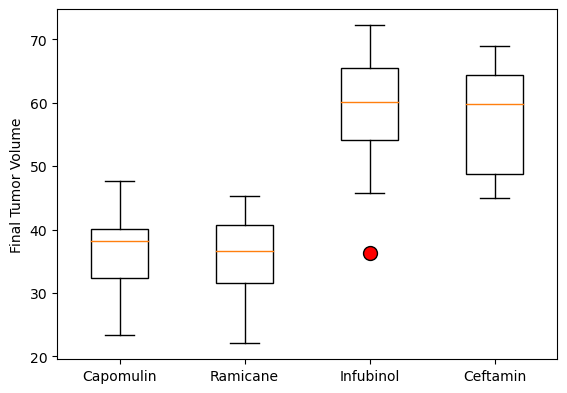

In [17]:
#https://python-charts.com/distribution/box-plot-matplotlib/#:~:text=The%20fill%20color%20of%20a,as%20in%20the%20following%20example.&text=The%20default%20color%20for%20the,passing%20a%20dict%20to%20medianprops%20.
#https://stackoverflow.com/questions/65648502/how-to-change-outlier-point-symbol-in-python-matplotlib-pyplot
#code was used to format outlier color
#https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/
#code was used to add multiple boxplots into one frame
fig = plt.figure(figsize =(5, 3.5))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(tumorVolData, patch_artist=True,boxprops = dict(facecolor = "white"),flierprops={'marker': 'o', 'markersize': 10, 'markerfacecolor': 'red'})

plt.ylabel("Final Tumor Volume")
plt.xticks([1,2,3,4], treatments)
plt.show()

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

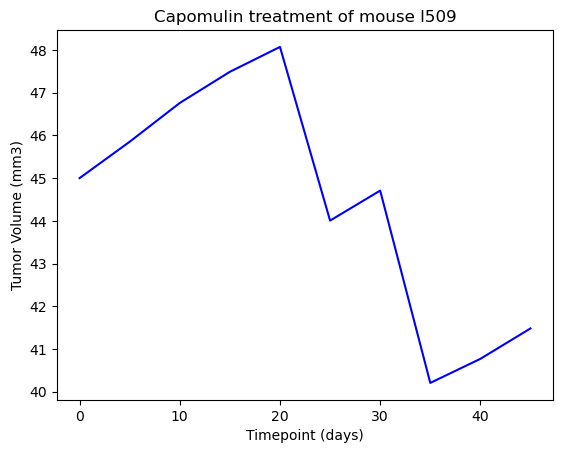

In [19]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

timepoints = combinedCleanData.loc[(combinedCleanData["Mouse ID"]=="l509"),"Timepoint"]
l509Tumor = combinedCleanData.loc[(combinedCleanData["Mouse ID"]=="l509"),"Tumor Volume (mm3)"]
l509Tumor
timepoints
linePlt, =  plt.plot(timepoints, l509Tumor, color = "blue")
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [20]:

weight_df = combinedCleanData.copy()

In [21]:
weight_dfFiltered = weight_df.loc[(weight_df["Drug Regimen"]=="Capomulin")]


In [22]:
weight = weight_dfFiltered["Weight (g)"].groupby(weight_dfFiltered["Mouse ID"]).mean()
tumVol= weight_dfFiltered["Tumor Volume (mm3)"].groupby(weight_dfFiltered["Mouse ID"]).mean()


In [23]:
weightVTumor = pd.DataFrame({
    "Weight (g)": weight,
    "Average Tumor Volume (mm3)": tumVol
    
})
weightVTumor

,Weight (g),Average Tumor Volume (mm3)
Mouse ID,,
b128,22.0,41.963636
b742,21.0,40.083699
f966,17.0,36.505973
g288,19.0,41.990097
g316,22.0,44.613344
i557,24.0,44.805810
i738,20.0,39.141053
j119,23.0,44.465236
j246,21.0,43.216925


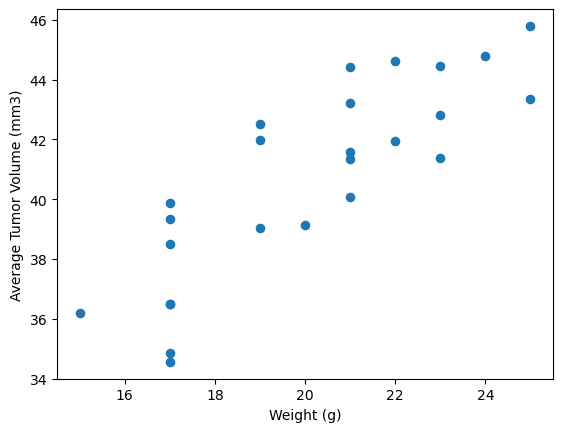

In [24]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
weightVTumor.plot(kind = "scatter", x ="Weight (g)", y="Average Tumor Volume (mm3)", s= 35)
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


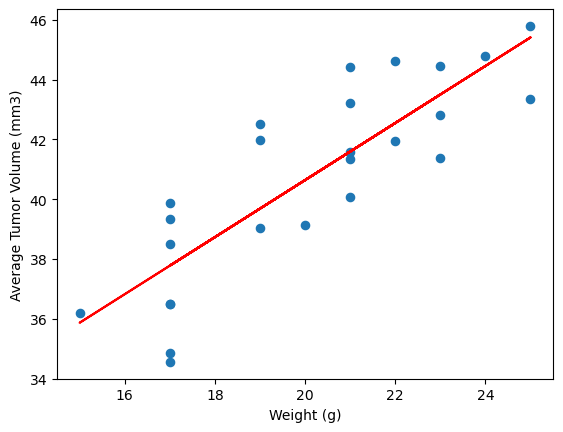

In [25]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
w_slope, w_int, w_r, w_p, w_std_err = stats.linregress(weight,tumVol)
wFit = w_slope * weight + w_int
print(f"The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(weight,tumVol)[0],2)}")
weightVTumor.plot(kind = "scatter", x ="Weight (g)", y="Average Tumor Volume (mm3)", s= 35)
plt.plot(weight, wFit,color='r')
plt.show()
